In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm ,gaussian_kde

generate dataset 

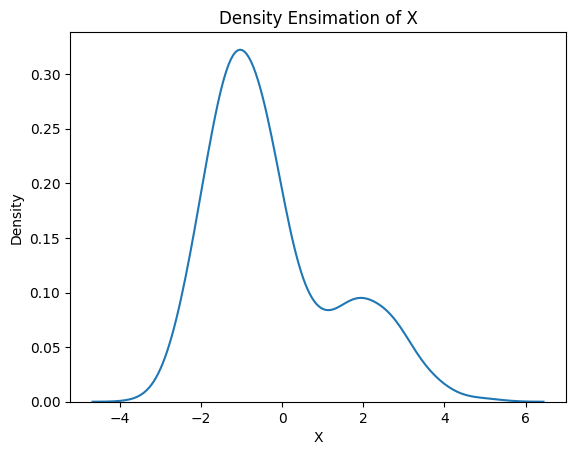

In [3]:
mu1,sigma1=2,1 
mu2,sigma2=-1,0.8
X1=np.random.normal(mu1,sigma1,size=200)
X2=np.random.normal(mu2,sigma2,size=600)
X=np.concatenate([X1,X2])


sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Ensimation of X')
plt.show()


In [4]:
mu1_hat,sigma1_hat=np.mean(X1),np.std(X1)
mu2_hat,sigma2_hat=np.mean(X2),np.std(X2)
pi1_hat,pi2_hat=len(X1)/len(X),len(X2)/len(X)

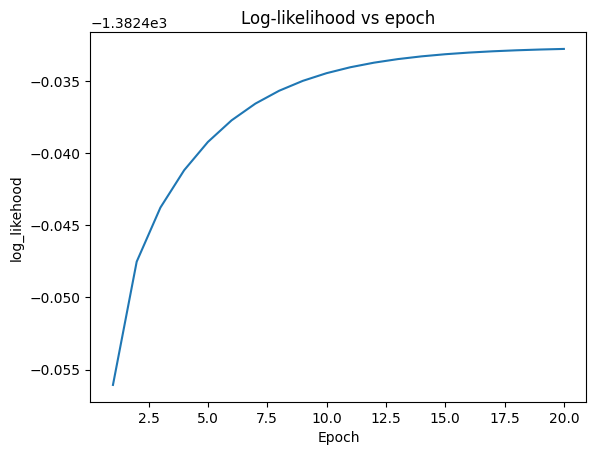

In [5]:
num_epochs=20 
log_likehoods=[]
for epochs in range(num_epochs):
    gamma1=pi1_hat*norm.pdf(X,mu1_hat,sigma1_hat)
    gamma2=pi2_hat*norm.pdf(X,mu2_hat,sigma2_hat)
    total=gamma1+gamma2
    gamma1/=total 
    gamma2/=total 

    mu1_hat=np.sum(gamma1*X)/np.sum(gamma1)
    mu2_hat=np.sum(gamma2*X)/np.sum(gamma2)
    sigma1_hat=np.sqrt(np.sum(gamma1*(X-mu1_hat)**2)/np.sum(gamma1))
    sigma2_hat=np.sqrt(np.sum(gamma2*(X-mu2_hat)**2)/np.sum(gamma2))
    pi1_hat=np.mean(gamma1)
    pi2_hat=np.mean(gamma2)
    log_likehood=np.sum(np.log(pi1_hat*norm.pdf(X,mu1_hat,sigma1_hat)+pi2_hat*norm.pdf(X,mu2_hat,sigma2_hat)))
    log_likehoods.append(log_likehood)
    
plt.plot(range(1,num_epochs+1),log_likehoods)
plt.xlabel('Epoch')
plt.ylabel('log_likehood')
plt.title('Log-likelihood vs epoch')
plt.show()

visualization 